In [1]:
import warnings
warnings.filterwarnings("ignore")
from collections import defaultdict
from tqdm import tqdm_notebook as tqdm
import mysql.connector
import codecs
codecs.register(lambda name: codecs.lookup('utf8') if name == 'utf8mb4' else None)
import re
import conllu

In [31]:
db = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd='password',
  database='small_commits_db',
  charset='utf8mb4')

cur = db.cursor()

In [3]:
def yield_c():
    cur.execute('SELECT conllu, date FROM C;')
    item = cur.fetchone()
    #print (text)
    while item:
        yield item
        item = cur.fetchone()

In [15]:
initials = defaultdict(lambda: defaultdict(int))
for item in tqdm(yield_c()):
    parsed = conllu.parse(item[0])
    if len(parsed) > 0:
        initials[parsed[0][0]['lemma'].lower()][parsed[0][0]['form'].lower()] += 1

In [16]:
with open('/home/dkbrz/git_commits/top_initials.', 'w') as f:
    keys = [key for key in initials.keys()]
    for key in keys:
        if sum(initials[key].values()) < 25:
            del initials[key]
    for key in sorted(initials, key=lambda x: sum(initials[x].values()), reverse=True):
        f.write('{}\t{}\n'.format(
            key,
            ';'.join(
                ['{}:{}'.format(k, initials[key][k]) for k in sorted(initials[key], 
                                                                     key=initials[key].get, reverse=True)
                ]
            )))

In [25]:
def yield_c():
    cur.execute('SELECT conllu, date FROM C;')
    item = cur.fetchone()
    #print (text)
    while item:
        yield item
        item = cur.fetchone()

In [32]:
total = {}
wordforms = {}
for line in open('/home/dkbrz/GitHub/Git_Commits/data/junk/forms.txt'):
    row = line.strip().split('\t')
    total[row[0]] = [0,0,0,0, 0,0,0,0]
    for key, value in enumerate(row[1:]):
        wordforms[value] = (row[0], key)

In [33]:
for item in tqdm(yield_c()):
    if item[1] < '2010-01-01 00:00:00':
        coef = 0
    elif item[1] > '2014-01-01 00:00:00':
        coef = 1
    else:
        coef = -1
    if coef >= 0:
        parsed = conllu.parse(item[0])
        if len(parsed) > 0:
            if parsed[0][0]['form'].lower() in wordforms:
                word, key = wordforms[parsed[0][0]['form'].lower()]
                total[word][key + coef*4] += 1

In [39]:
data = []
for key in sorted(total, key=lambda x: sum(total[x]), reverse=True):
    for key2, val in enumerate(['neut', 'ptcp', 'ing', '3rd']):
        data.append((key, 'before', val, total[key][key2]))
        data.append((key, 'after', val, total[key][key2+4]))

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.DataFrame(data)
df.columns = ['Word', 'Date', 'Gr', 'N']

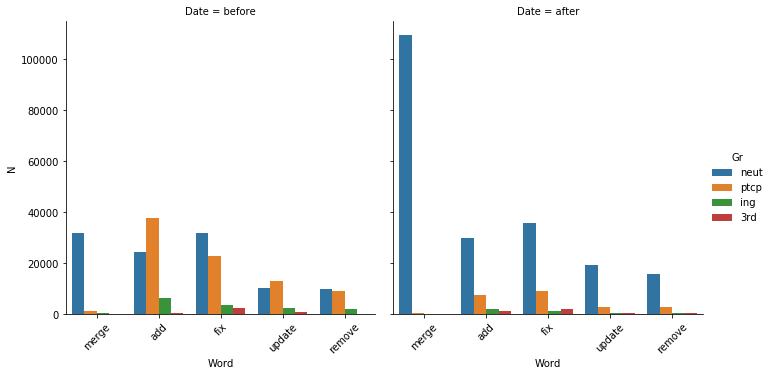

In [93]:
g = sns.catplot(x="Word", y="N", hue='Gr', col='Date', hue_order=['neut', 'ptcp', 'ing', '3rd'], data=df[:40], kind="bar")
#plt.ylim((0, 40000))
g.set_xticklabels(rotation=45)

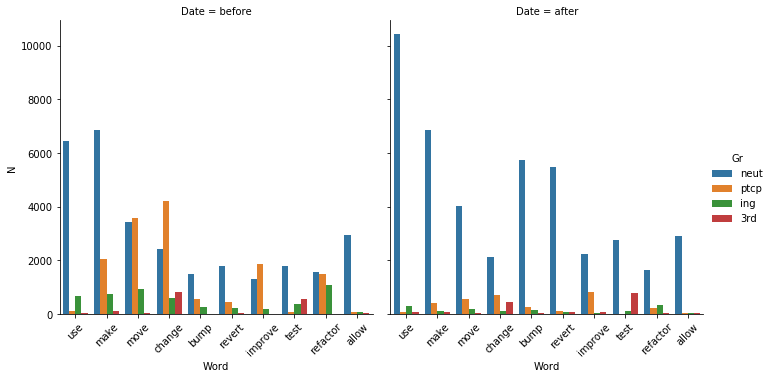

In [94]:
g = sns.catplot(x="Word", y="N", hue='Gr', col='Date', hue_order=['neut', 'ptcp', 'ing', '3rd'], data=df[40:120], kind="bar")
g.set_xticklabels(rotation=45)

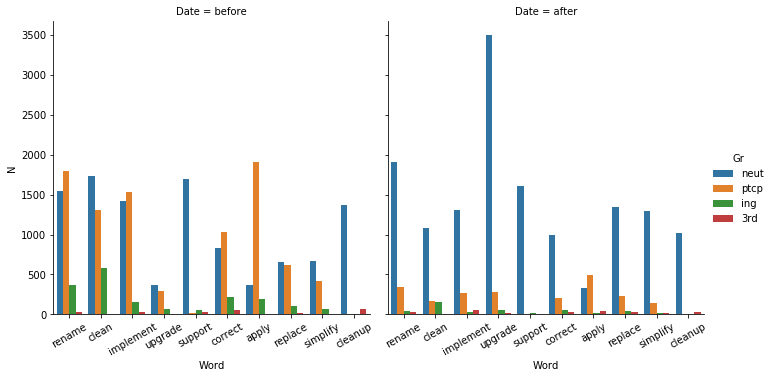

In [96]:
g = sns.catplot(x="Word", y="N", hue='Gr', col='Date', hue_order=['neut', 'ptcp', 'ing', '3rd'], data=df[120:200], kind="bar")
g.set_xticklabels(rotation=30)

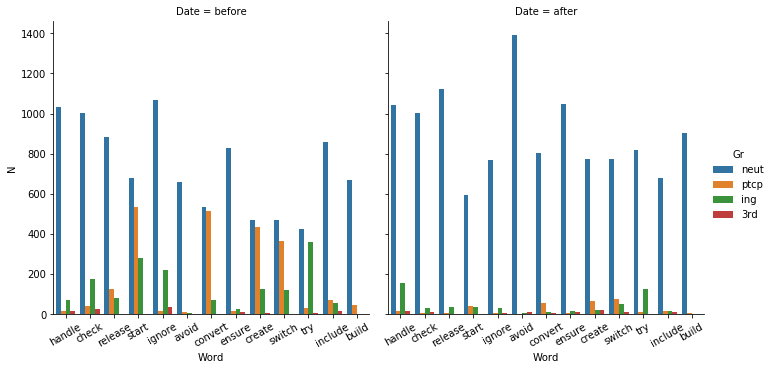

In [97]:
g = sns.catplot(x="Word", y="N", hue='Gr', col='Date', hue_order=['neut', 'ptcp', 'ing', '3rd'], data=df[200:300], kind="bar")
g.set_xticklabels(rotation=30)

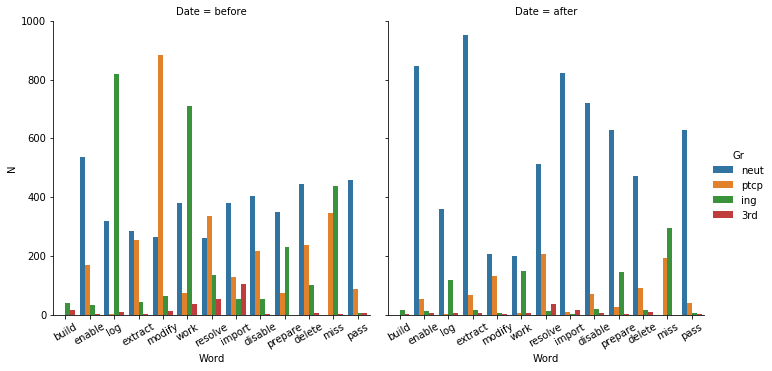

In [100]:
g = sns.catplot(x="Word", y="N", hue='Gr', col='Date', hue_order=['neut', 'ptcp', 'ing', '3rd'], data=df[300:400], kind="bar")
g.set_xticklabels(rotation=30)

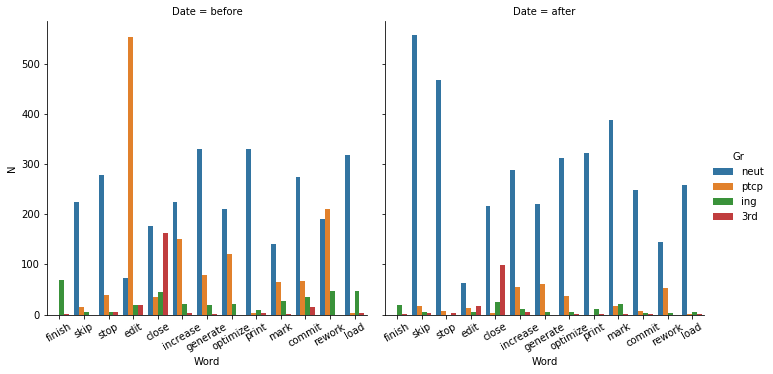

In [101]:
g = sns.catplot(x="Word", y="N", hue='Gr', col='Date', hue_order=['neut', 'ptcp', 'ing', '3rd'], data=df[500:600], kind="bar")
g.set_xticklabels(rotation=30)

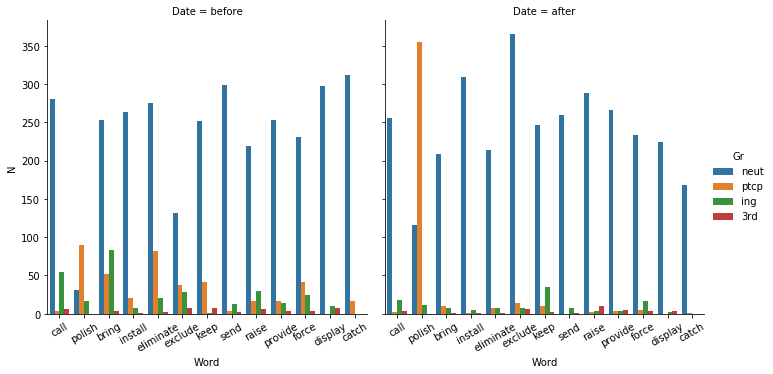

In [103]:
g = sns.catplot(x="Word", y="N", hue='Gr', col='Date', hue_order=['neut', 'ptcp', 'ing', '3rd'], data=df[600:700], kind="bar")
g.set_xticklabels(rotation=30)